In [1]:
#Importation librairies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import ast
import re

In [2]:
#Jeu de données 2015
data2015 = pd.read_csv("2015-building-energy-benchmarking.csv",index_col=0)

In [3]:
data2015.shape

(3340, 46)

In [4]:
#Jeu de données 2016
data2016 = pd.read_csv("2016-building-energy-benchmarking.csv",index_col=0)

In [5]:
data2016.shape

(3376, 45)

In [6]:
data2015.columns

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'TaxParcelIdentificationNumber', 'Location', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'DefaultData', 'Comment',
       'Compli

In [7]:
data2016.columns

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber',
       'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier',
       'TotalGHGEmiss

In [8]:
#données manquantes 2015
df_null=data2015.isnull().sum().sort_values()
print(df_null)

DataYear                                                            0
ComplianceStatus                                                    0
PropertyGFABuilding(s)                                              0
PropertyGFAParking                                                  0
PropertyGFATotal                                                    0
NumberofBuildings                                                   0
YearBuilt                                                           0
Zip Codes                                                           0
CouncilDistrictCode                                                 0
Location                                                            0
PropertyName                                                        0
PrimaryPropertyType                                                 0
BuildingType                                                        0
Neighborhood                                                        0
DefaultData         

In [9]:
#données manquantes 2016
data2016.isnull().sum().sort_values()
print(df_null)

DataYear                                                            0
ComplianceStatus                                                    0
PropertyGFABuilding(s)                                              0
PropertyGFAParking                                                  0
PropertyGFATotal                                                    0
NumberofBuildings                                                   0
YearBuilt                                                           0
Zip Codes                                                           0
CouncilDistrictCode                                                 0
Location                                                            0
PropertyName                                                        0
PrimaryPropertyType                                                 0
BuildingType                                                        0
Neighborhood                                                        0
DefaultData         

In [10]:
data2015.iloc[0:5]

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [11]:
data2016.iloc[0:5]

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [12]:
#I-traitement des colonnes des 2 dataframes puis concaténation 

In [13]:
#les colonnes dans data2015 et non dans data2016
set(data2015) - set(data2016)

{'2010 Census Tracts',
 'City Council Districts',
 'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes'}

In [14]:
#maitenant l'inverse
set(data2016) - set(data2015)

{'Address',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

In [15]:
#correction des noms de colonnes pour être les mêmes dans les deux jeu de données 
data2015 = data2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                    'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity'})

In [16]:
#Récupérer des colonnes à partir de la colonne "Location",chaque value est une double dictionnaire

data2015['Location'][1]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [17]:
data2015['Latitude']=data2015['Location'].apply(lambda ligne : ast.literal_eval(ligne)['latitude'])
data2015['Longitude']=data2015['Location'].apply(lambda ligne : ast.literal_eval(ligne)['longitude'])
data2015['State']=data2015['Location'].apply(lambda ligne :  ast.literal_eval(ast.literal_eval(ligne)['human_address'])['state'])
data2015['ZipCode']=data2015['Location'].apply(lambda ligne:  ast.literal_eval(ast.literal_eval(ligne)['human_address'])['zip'])
data2015['City']=data2015['Location'].apply(lambda ligne :  ast.literal_eval(ast.literal_eval(ligne)['human_address'])['city'])
data2015['Address']=data2015['Location'].apply(lambda ligne :  ast.literal_eval(ast.literal_eval(ligne)['human_address'])['address'])

In [18]:
#supprimer les colonnes non pertinents dans data2015
data2015.drop(['Location','SPD Beats','Seattle Police Department Micro Community Policing Plan Areas',
               'Zip Codes','2010 Census Tracts',"OtherFuelUse(kBtu)",'City Council Districts','Comment'],axis='columns', inplace=True)

In [19]:
#supprimer les colonnes non pertinents dans data2016
data2016= data2016.drop(['Comments'], axis=1)

In [20]:
#Vérification de correction
set(data2015) - set(data2016)
set(data2016) - set(data2015)

set()

In [21]:
pd.set_option("display.max_columns", 2000)
pd.set_option("display.max_rows",2000)

In [22]:
#mettre les dtypes des colonnes sur la même échelle avant la combinaison
pd.DataFrame([data2015.dtypes,data2016.dtypes])

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,State,ZipCode,City,Address
0,int64,object,object,object,object,int64,object,int64,int64,float64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,object,object,object
1,int64,object,object,object,object,int64,object,int64,float64,int64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,object,object,float64,float64,object,float64,object,object


In [23]:
data2015[['Latitude','Longitude','ZipCode']]=data2015[['Latitude','Longitude','ZipCode']].astype('float64')

In [24]:
data2015['DefaultData'] = data2015['DefaultData'].map({'Yes' : True, 'No' : False}).head()

In [25]:
#maintenant concaténation de deux dataframes
data=pd.concat([data2015,data2016],axis=0,ignore_index=True)

In [26]:
data.shape

(6716, 44)

In [27]:
data.iloc[0:10]

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,State,ZipCode,City,Address
0,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,False,Compliant,NaN,47.612190,-122.337997,WA,98101.0,SEATTLE,405 OLIVE WAY
1,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,False,Compliant,NaN,47.613106,-122.333358,WA,98101.0,SEATTLE,724 PINE ST
2,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,True,Compliant,NaN,47.613349,-122.337699,WA,98101.0,SEATTLE,1900 5TH AVE
3,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,1936.34,31.38,False,Compliant,High Outlier,47.614216,-122.336609,WA,98101.0,SEATTLE,620 STEWART ST
4,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,507.70,4.02,False,Compliant,NaN,47.613754,-122.340924,WA,98121.0,SEATTLE,401 LENORA ST
5,2015,Nonresidential COS,Other,WEST PRECINCT (SEATTLE POLICE),660000560,7,DOWNTOWN,1999,1.0,2.0,97288,37198,60090,Police Station,Police Station,88830.0,NaN,NaN,NaN,NaN,NaN,NaN,135.7,146.9,313.5,321.6,12051984.0,13045258.0,0.0,2130921.0,7271004.0,47813.0,4781283.0,304.62,2.81,NaN,Compliant,NaN,47.616439,-122.336764,WA,98101.0,SEATTLE,810 VIRGINIA ST
6,2015,NonResidential,Hotel,CAMLIN WORLDMARK HOTEL,660000825,7,DOWNTOWN,1926,1.0,11.0,83008,0,83008,Hotel,Hotel,81352.0,NaN,NaN,NaN,NaN,NaN,25.0,76.9,79.6,149.5,158.2,6252842.0,6477493.0,0.0,785342.0,2679698.0,35733.0,3573255.0,208.46,2.37,NaN,Compliant,NaN,47.614114,-122.332741,WA,98101.0,SEATTLE,1619 9TH AVE
7,2015,NonResidential,Other,PARAMOUNT THEATER,660000955,7,DOWNTOWN,1926,1.0,8.0,102761,0,102761,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,102761.0,NaN,NaN,NaN,NaN,NaN,NaN,62.5,71.8,152.2,160.4,6426022.0,7380086.0,2003108.0,1203937.0,4108004.0,3151.0,315079.0,199.99,1.77,NaN,Compliant,NaN,47.612902,-122.331309,WA,98101.0,SEATTLE,901 PINE ST
8,2015,NonResidential,Hotel,COURTYARD BY MARRIOTT - ALASKA BLDG SEATTLE,939000080,7,DOWNTOWN,1904,1.0,15.0,163984,0,163984,Hotel,Hotel,163984.0,NaN,NaN,NaN,NaN,NaN,46.0,77.0,82.9,174.6,186.8,12633744.0,13589025.0,0.0,2155728.0,7355649.0,52784.0,5278400.0,331.61,1.83,NaN,Compliant,NaN,47.602589,-122.332553,WA,98104.0,SEATTLE,612 2ND AVE
9,2015,Multifamily MR (5-9),Mid-Rise Multifamily,LYON BUILDING,939000105,7,DOWNTOWN,1910,1.0,6.0,63712,1496

In [28]:
#seuls les bâtiments non destinés à l'habitation seront étudiés
#donc supprimer toutes les autres bâtiments
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [29]:
data = data[~data['BuildingType'].str.contains("Multifamily")]

In [30]:
data.shape

(3318, 44)

In [31]:
#II-traitement des valeurs de colonnes :
for i in list(data.keys()):
    if data[i].nunique()<30:
        print(i,' : ', data[i].unique())
    else:
        continue

DataYear  :  [2015 2016]
BuildingType  :  ['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus'
 'Nonresidential WA']
CouncilDistrictCode  :  [7 3 2 4 5 6 1]
Neighborhood  :  ['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'CENTRAL' 'NORTH'
 'MAGNOLIA / QUEEN ANNE' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'SOUTHWEST' 'DELRIDGE' 'Central' 'Ballard' 'North' 'Delridge'
 'Northwest' 'DELRIDGE NEIGHBORHOODS']
NumberofBuildings  :  [  1.   7.  11.  16.   4.   3.  39.   2.  10.   6.   0.  27.  14.   9.
   5.  nan   8.  23. 111.]
DefaultData  :  [False True nan]
ComplianceStatus  :  ['Compliant' 'Error - Correct Default Data' 'Missing Data' 'Non-Compliant']
Outlier  :  [nan 'High Outlier' 'Low Outlier' 'High outlier' 'Low outlier']
State  :  ['WA']
City  :  ['SEATTLE' 'Seattle']


In [32]:
#Corriger les valeurs de la variable Neighborhood :

data['Neighborhood'].replace('Delridge', 'DELRIDGE', inplace=True)
data['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
data['Neighborhood'].replace('North', 'NORTH', inplace=True)
data['Neighborhood'].replace('Northwest', 'NORTHWEST', inplace=True)
data['Neighborhood'].replace('Central', 'CENTRAL', inplace=True)
data['Neighborhood'].replace('Ballard', 'BALLARD', inplace=True)

In [33]:
# Corriger les valeurs de la variable Outlier  
data['Outlier'].replace('High outlier', 'High Outlier', inplace=True)
data['Outlier'].replace('Low outlier', 'Low Outlier', inplace=True)

In [34]:
#Aussi pour quelques autres variables"
data['City'].replace('Seattle', 'SEATTLE', inplace=True)
data['ComplianceStatus'].replace('Not Compliant', 'Non-Compliant', inplace=True)
data['ComplianceStatus'].replace('Error - Correct Default Data', 'Missing Data', inplace=True)
data['NumberofBuildings'].replace(0, 1, inplace=True)

In [35]:
#Corriger les valeurs de PrimaryPropertyType
data.loc[(data['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    580
Other                          380
Large Office                   335
Mixed Use Property             201
Retail Store                   191
Non-Refrigerated Warehouse     181
Warehouse                      180
Hotel                          149
Worship Facility               143
Medical Office                  80
K-12 School                     78
Distribution Center             53
Distribution Center\n           49
Supermarket / Grocery Store     40
Senior Care Community           39
Supermarket/Grocery Store       36
Self-Storage Facility           29
Self-Storage Facility\n         27
Refrigerated Warehouse          25
Residence Hall                  21
Hospital                        20
University                      17
College/University              16
Residence Hall/Dormitory        15
Restaurant                      12
Laboratory                      11
Restaurant\n                    10
Low-Rise Multifamily             3
Name: PrimaryPropert

In [36]:
#correction des catégories maitenant
regex = re.compile(r'[\n\r\t]')
data['PrimaryPropertyType'] = [regex.sub("", item) for index, item in data.PrimaryPropertyType.iteritems()]
data.loc[(data['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    580
Other                          380
Large Office                   335
Mixed Use Property             201
Retail Store                   191
Non-Refrigerated Warehouse     181
Warehouse                      180
Hotel                          149
Worship Facility               143
Distribution Center            102
Medical Office                  80
K-12 School                     78
Self-Storage Facility           56
Supermarket / Grocery Store     40
Senior Care Community           39
Supermarket/Grocery Store       36
Refrigerated Warehouse          25
Restaurant                      22
Residence Hall                  21
Hospital                        20
University                      17
College/University              16
Residence Hall/Dormitory        15
Laboratory                      11
Low-Rise Multifamily             3
Name: PrimaryPropertyType, dtype: int64

In [37]:
#III-traitement des valeurs manquantes
df_null1=data.isnull().sum().sort_values()
print(df_null1)

DataYear                              0
State                                 0
Longitude                             0
Latitude                              0
ComplianceStatus                      0
City                                  0
PropertyGFABuilding(s)                0
PropertyGFAParking                    0
PropertyGFATotal                      0
Address                               0
YearBuilt                             0
Neighborhood                          0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
CouncilDistrictCode                   0
TaxParcelIdentificationNumber         1
NumberofBuildings                     2
NumberofFloors                        8
GHGEmissionsIntensity                 9
TotalGHGEmissions                     9
NaturalGas(kBtu)                      9
NaturalGas(therms)                    9
Electricity(kBtu)                     9
Electricity(kWh)                      9


In [38]:
#supprimer les valeurs nulles de SiteEnergyUse(kBtu)
index_supprimer = data[data['SiteEnergyUse(kBtu)']<1].index
print(index_supprimer)

Int64Index([  44,  572, 3368, 3371, 3402, 3421, 3425, 3435, 3473, 3479, 3492,
            3644, 3954, 3970, 4086, 4701, 5234, 6506],
           dtype='int64')


In [39]:
data.drop(index_supprimer, inplace=True, axis=0)

In [40]:
data.shape

(3300, 44)

In [41]:
#supprimer les valeurs négatives de TotalGHGEmissions 
index_supprimer2 = data[data['TotalGHGEmissions']<0].index
print(index_supprimer2)

Int64Index([6546], dtype='int64')


In [42]:
data.drop(index_supprimer2, inplace=True, axis=0)

In [43]:
data.shape

(3299, 44)

In [44]:
#supprimer les valeurs négatives de  PropertyGFAParking 
index_supprimer3 = data[data['PropertyGFAParking']<0].index
print(index_supprimer3)

Int64Index([3136], dtype='int64')


In [45]:
data.drop(index_supprimer3, inplace=True, axis=0)

In [46]:
data.shape

(3298, 44)

In [47]:
#supprimer les valeurs négatives de  PropertyGFABuilding(s)
index_supprimer4 = data[data['PropertyGFABuilding(s)']<0].index
print(index_supprimer4)

Int64Index([3139, 3322], dtype='int64')


In [48]:
data.drop(index_supprimer4, inplace=True, axis=0)

In [49]:
data.shape

(3296, 44)

In [50]:
#supprimer les lignes completemet vide s'ils existent
data.dropna(how = 'all', axis=0, inplace=True)

In [51]:
data.shape

(3296, 44)

In [52]:
df_null1=data.isnull().sum().sort_values()
print(df_null1)

DataYear                              0
State                                 0
Longitude                             0
Latitude                              0
ComplianceStatus                      0
City                                  0
PropertyGFABuilding(s)                0
PropertyGFAParking                    0
PropertyGFATotal                      0
Address                               0
YearBuilt                             0
Neighborhood                          0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
CouncilDistrictCode                   0
TaxParcelIdentificationNumber         1
NumberofBuildings                     2
NumberofFloors                        8
GHGEmissionsIntensity                 9
TotalGHGEmissions                     9
NaturalGas(kBtu)                      9
NaturalGas(therms)                    9
Electricity(kBtu)                     9
Electricity(kWh)                      9


In [53]:
#on choisit les variables à prédir TotalGHGEmissions et SiteEnergyUse(kBtu)
#et on supprime les variables liées 
drop_cols = ['SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)',     #'SiteEUI(kBtu/sf)', ,'GHGEmissionsIntensity'
             'SiteEnergyUseWN(kBtu)','SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)',
            'NaturalGas(therms)', 'NaturalGas(kBtu)']
for col in drop_cols: 
    data.drop(col,axis='columns',inplace=True)

In [54]:
#traitements des variables numériques :
cols_num = data.drop(['ENERGYSTARScore'], axis=1).select_dtypes(['int64', 'float64']).copy()
cols_num.shape

(3296, 18)

In [55]:
pd.DataFrame([data.dtypes])

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,Latitude,Longitude,State,ZipCode,City,Address
0,int64,object,object,object,object,int64,object,int64,float64,float64,int64,int64,int64,object,object,float64,object,float64,object,float64,object,float64,float64,float64,float64,float64,object,object,object,float64,float64,object,float64,object,object


In [56]:
#Remplacer les valeurs manquantes de NumberofFloors avec le mode
cols_num.NumberofFloors.value_counts()

1.0     908
2.0     783
3.0     536
4.0     295
5.0     201
6.0     165
7.0      67
8.0      43
11.0     35
10.0     35
0.0      21
14.0     17
12.0     16
9.0      16
13.0     13
15.0     13
42.0     10
19.0     10
17.0      8
21.0      6
16.0      6
22.0      6
20.0      6
18.0      6
29.0      6
24.0      6
33.0      6
25.0      6
23.0      5
41.0      4
36.0      4
34.0      4
76.0      2
30.0      2
47.0      2
99.0      2
39.0      2
46.0      2
28.0      2
55.0      2
63.0      2
37.0      2
49.0      2
56.0      2
27.0      1
Name: NumberofFloors, dtype: int64

In [57]:
#c'est le 1
data.NumberofFloors.replace(np.nan,1,inplace=True)

In [58]:
df_null1=data.isnull().sum().sort_values()
print(df_null1)

DataYear                              0
State                                 0
Longitude                             0
Latitude                              0
ComplianceStatus                      0
City                                  0
PropertyGFABuilding(s)                0
PropertyGFAParking                    0
PropertyGFATotal                      0
Address                               0
YearBuilt                             0
Neighborhood                          0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
CouncilDistrictCode                   0
NumberofFloors                        0
TaxParcelIdentificationNumber         1
NumberofBuildings                     2
GHGEmissionsIntensity                 9
TotalGHGEmissions                     9
SiteEnergyUse(kBtu)                   9
SiteEUI(kBtu/sf)                      9
ZipCode                              16
ListOfAllPropertyUseTypes            63


In [59]:
data.shape

(3296, 35)

In [60]:
#Remplacer les valeurs manquantes de NumberofBuildings avec le mode

data.NumberofBuildings.isna().sum()

2

In [61]:
data.NumberofBuildings.value_counts()

1.0      3228
2.0        15
3.0        14
5.0         8
6.0         6
4.0         5
7.0         4
10.0        2
14.0        2
8.0         2
11.0        2
16.0        1
39.0        1
23.0        1
111.0       1
27.0        1
9.0         1
Name: NumberofBuildings, dtype: int64

In [62]:
data.NumberofBuildings.replace(np.nan,1,inplace=True)

In [63]:
data.NumberofBuildings.isna().sum()

0

In [64]:
# Supprimer les lignes comportent de valeurs manquantes sur les variables cibles :
data = data[~((data['TotalGHGEmissions'].isnull()) | (data['SiteEnergyUse(kBtu)'].isnull()))]

In [65]:
data.isna().sum()

DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
TaxParcelIdentificationNumber         1
CouncilDistrictCode                   0
Neighborhood                          0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes            61
LargestPropertyUseType               69
LargestPropertyUseTypeGFA            69
SecondLargestPropertyUseType       1626
SecondLargestPropertyUseTypeGFA    1626
ThirdLargestPropertyUseType        2605
ThirdLargestPropertyUseTypeGFA     2605
YearsENERGYSTARCertified           3102
ENERGYSTARScore                    1080
SiteEUI(kBtu/sf)                      0
SiteEnergyUse(kBtu)                   0
TotalGHGEmissions                     0


In [66]:
#Traitement de la colonne ComplianceStatus
data['ComplianceStatus'].unique()

array(['Compliant', 'Missing Data', 'Non-Compliant'], dtype=object)

In [67]:
#supprimer les lignes identifiées  non conforme ('Missing Data')
data[data['ComplianceStatus'] != "Compliant"].shape[0]

102

In [68]:
data = data[data['ComplianceStatus'] == "Compliant"]

In [69]:
data.shape

(3185, 35)

In [70]:
#supprimer les colonnes inutiles
cols_inutiles=['YearsENERGYSTARCertified','PropertyName','TaxParcelIdentificationNumber','DefaultData',
               'ListOfAllPropertyUseTypes','State', 'City','ZipCode', 'Address']
for col in cols_inutiles:
    data.drop(col,axis='columns',inplace=True)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3185 entries, 0 to 6715
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         3185 non-null   int64  
 1   BuildingType                     3185 non-null   object 
 2   PrimaryPropertyType              3185 non-null   object 
 3   CouncilDistrictCode              3185 non-null   int64  
 4   Neighborhood                     3185 non-null   object 
 5   YearBuilt                        3185 non-null   int64  
 6   NumberofBuildings                3185 non-null   float64
 7   NumberofFloors                   3185 non-null   float64
 8   PropertyGFATotal                 3185 non-null   int64  
 9   PropertyGFAParking               3185 non-null   int64  
 10  PropertyGFABuilding(s)           3185 non-null   int64  
 11  LargestPropertyUseType           3116 non-null   object 
 12  LargestPropertyUseTy

In [72]:
#Il nous reste 6 variables contenant de valeurs manquantes  à traiter :

#LargestPropertyUseType           3102 non-null   object 
#LargestPropertyUseTypeGFA        3102 non-null   float64
#SecondLargestPropertyUseType     1643 non-null   object 
#SecondLargestPropertyUseTypeGFA  1643 non-null   float64
#ThirdLargestPropertyUseType      672 non-null    object 
#ThirdLargestPropertyUseTypeGFA   672 non-null    float64


#Remplacer les valeurs maquantes de LargestPropertyUseType par Missing information :
data['LargestPropertyUseType'] = data['LargestPropertyUseType'].fillna('Missing information')

In [73]:
#Remplacer les valeurs maquantes de 'ThirdLargestPropertyUseTypeGFA' et 'SecondLargestPropertyUseTypeGFA' par 0 :

data[['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']] = data[['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']].fillna(0, )

In [74]:
#Remplacer les valeurs maquantes de 'ThirdLargestPropertyUseType' et 'SecondLargestPropertyUseType' par No Use :

data[['ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType']] = data[['ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType']].fillna('No Use')

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3185 entries, 0 to 6715
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         3185 non-null   int64  
 1   BuildingType                     3185 non-null   object 
 2   PrimaryPropertyType              3185 non-null   object 
 3   CouncilDistrictCode              3185 non-null   int64  
 4   Neighborhood                     3185 non-null   object 
 5   YearBuilt                        3185 non-null   int64  
 6   NumberofBuildings                3185 non-null   float64
 7   NumberofFloors                   3185 non-null   float64
 8   PropertyGFATotal                 3185 non-null   int64  
 9   PropertyGFAParking               3185 non-null   int64  
 10  PropertyGFABuilding(s)           3185 non-null   int64  
 11  LargestPropertyUseType           3185 non-null   object 
 12  LargestPropertyUseTy

In [76]:
#Remplacer les valeurs manquantes de LargestPropertyUseTypeGFA par les valeurs correspondantes de PropertyGFABuilding(s) 
for index in range(len(data)):
    if np.isnan(data.iloc[index]['LargestPropertyUseTypeGFA']):
        data['LargestPropertyUseTypeGFA'].iloc[index] = data['PropertyGFABuilding(s)'].iloc[index]

C:\Users\Roudy\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3185 entries, 0 to 6715
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         3185 non-null   int64  
 1   BuildingType                     3185 non-null   object 
 2   PrimaryPropertyType              3185 non-null   object 
 3   CouncilDistrictCode              3185 non-null   int64  
 4   Neighborhood                     3185 non-null   object 
 5   YearBuilt                        3185 non-null   int64  
 6   NumberofBuildings                3185 non-null   float64
 7   NumberofFloors                   3185 non-null   float64
 8   PropertyGFATotal                 3185 non-null   int64  
 9   PropertyGFAParking               3185 non-null   int64  
 10  PropertyGFABuilding(s)           3185 non-null   int64  
 11  LargestPropertyUseType           3185 non-null   object 
 12  LargestPropertyUseTy

In [78]:
data.isna().sum().sort_values()

DataYear                              0
ComplianceStatus                      0
GHGEmissionsIntensity                 0
TotalGHGEmissions                     0
SiteEnergyUse(kBtu)                   0
SiteEUI(kBtu/sf)                      0
ThirdLargestPropertyUseTypeGFA        0
ThirdLargestPropertyUseType           0
SecondLargestPropertyUseTypeGFA       0
SecondLargestPropertyUseType          0
Latitude                              0
LargestPropertyUseTypeGFA             0
PropertyGFABuilding(s)                0
PropertyGFAParking                    0
PropertyGFATotal                      0
NumberofFloors                        0
NumberofBuildings                     0
YearBuilt                             0
Neighborhood                          0
CouncilDistrictCode                   0
PrimaryPropertyType                   0
BuildingType                          0
LargestPropertyUseType                0
Longitude                             0
ENERGYSTARScore                    1074


In [79]:
data.shape

(3185, 26)

In [80]:
data.iloc[0:10]

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ComplianceStatus,Outlier,Latitude,Longitude
0,2015,NonResidential,Hotel,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,88434.0,No Use,0.0,No Use,0.0,65.0,78.9,6981428.0,249.43,2.64,Compliant,NaN,47.612190,-122.337997
1,2015,NonResidential,Hotel,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,51.0,94.4,8354235.0,263.51,2.38,Compliant,NaN,47.613106,-122.333358
2,2015,NonResidential,Hotel,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,18.0,96.6,73130656.0,2061.48,1.92,Compliant,NaN,47.613349,-122.337699
3,2015,NonResidential,Hotel,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,61320.0,No Use,0.0,No Use,0.0,1.0,460.4,28229320.0,1936.34,31.38,Compliant,High Outlier,47.614216,-122.336609
4,2015,NonResidential,Hotel,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,67.0,120.1,14829099.0,507.70,4.02,Compliant,NaN,47.613754,-122.340924
5,2015,Nonresidential COS,Other,7,DOWNTOWN,1999,1.0,2.0,97288,37198,60090,Police Station,88830.0,No Use,0.0,No Use,0.0,NaN,135.7,12051984.0,304.62,2.81,Compliant,NaN,47.616439,-122.336764
6,2015,NonResidential,Hotel,7,DOWNTOWN,1926,1.0,11.0,83008,0,83008,Hotel,81352.0,No Use,0.0,No Use,0.0,25.0,76.9,6252842.0,208.46,2.37,Compliant,NaN,47.614114,-122.332741
7,2015,NonResidential,Other,7,DOWNTOWN,1926,1.0,8.0,102761,0,102761,Other - Entertainment/Public Assembly,102761.0,No Use,0.0,No Use,0.0,NaN,62.5,6426022.0,199.99,1.77,Compliant,NaN,47.612902,-122.331309
8,2015,NonResidential,Hotel,7,DOWNTOWN,1904,1.0,15.0,163984,0,163984,Hotel,163984.0,No Use,0.0,No Use,0.0,46.0,77.0,12633744.0,331.61,1.83,Compliant,NaN,47.602589,-122.332553
10,2015,NonResidential,Hotel,7,DOWNTOWN,1969,1.0,11.0,153163,19279,133884,Missing information,133884.0,No Use,0.0,No Use,0.0,48.0,101.1,14719853.0,576.63,3.59,Compliant,NaN,47.607121,-122.334319


In [81]:
#IV-Traitement de valeurs aberrantes 

# on sait pas à quoi correspondent la colonne outlier, comme
#il y a 46 lignes seulement indiquant des outliers, supprimons ces lignes, 
data = data[~data["Outlier"].isnull()==False]

In [82]:
data.shape

(3156, 26)

In [83]:
data.describe()

,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude
count,3156.000000,3156.000000,3156.000000,3156.000000,3156.000000,3.156000e+03,3156.000000,3.156000e+03,3.156000e+03,3156.000000,3156.000000,2086.000000,3156.000000,3.156000e+03,3156.000000,3156.000000,3156.000000,3156.000000
mean,2015.490177,4.390684,1961.407161,1.138466,4.196134,1.172240e+05,13766.300063,1.034577e+05,9.641290e+04,18623.863846,3004.800507,63.996165,72.583872,8.258057e+06,181.266242,1.500089,47.616147,-122.333313
std,0.499983,2.196329,32.722963,2.269657,6.691708,2.559264e+05,44475.253587,2.384166e+05,2.303276e+05,51326.380484,16282.632501,28.424514,72.070166,2.579446e+07,680.984476,2.189791,0.047638,0.023907
min,2015.000000,1.000000,1900.000000,1.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.200000,1.144100e+04,0.000000,0.000000,47.499331,-122.411820
25%,2015.000000,2.000000,1930.000000,1.000000,1.000000,2.920700e+04,0.000000,2.830400e+04,2.537000e+04,0.000000,0.000000,46.000000,34.000000,1.242200e+06,20.097500,0.280000,47.586695,-122.343270
50%,2015.000000,4.000000,1965.000000,1.000000,2.000000,4.881950e+04,0.000000,4.672100e+04,4.276000e+04,0.000000,0.000000,71.000000,52.700001,2.602079e+06,49.365000,0.790000,47.612348,-122.333160
75%,2016.000000,7.000000,1989.000000,1.000000,4.000000,1.053250e+05,0.000000,9.471300e+04,9.153200e+04,12879.500000,0.000000,88.000000,83.325003,7.012554e+06,139.645000,1.802500,47.649017,-122.322401
max,2016.000000,7.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,8.739237e+08,16870.980000,34.090000,47.733870,-122.258795


In [84]:
data.columns

Index(['DataYear', 'BuildingType', 'PrimaryPropertyType',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'ComplianceStatus', 'Outlier', 'Latitude', 'Longitude'],
      dtype='object')

In [85]:
#V-Feature engineering :

#traitement de l'âge des bâtiments et la distance au centre de Seattle pour chaque batiment :

#créer une nouvelle variable l'âge de bâtiment Building_Age 
data['Building_Age'] = data['DataYear'] - data['YearBuilt']
data.drop('YearBuilt', axis=1, inplace=True)

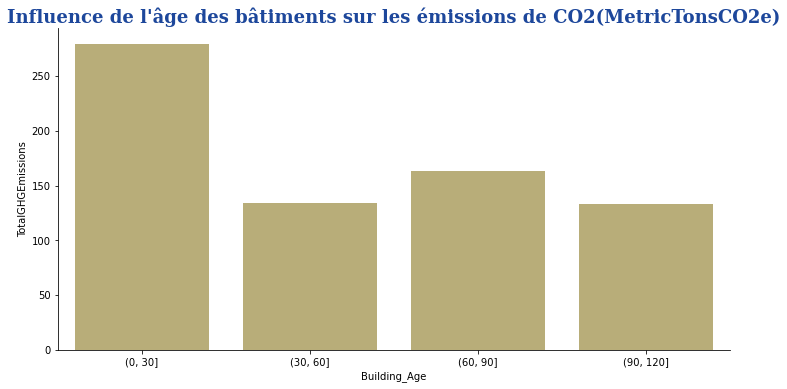

In [86]:
classes = pd.IntervalIndex.from_tuples([(0,30), (30, 60), (60,90), (90,120)])
font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
sns.catplot(
    data=data, kind="bar",
    x=pd.cut(data['Building_Age'], bins=classes), y="TotalGHGEmissions",
    ci=None, color="#9C830E", alpha=.6,
    height=5, aspect=2
)
plt.title("Influence de l'âge des bâtiments sur les émissions de CO2(MetricTonsCO2e)", fontdict=font_title)
plt.show()

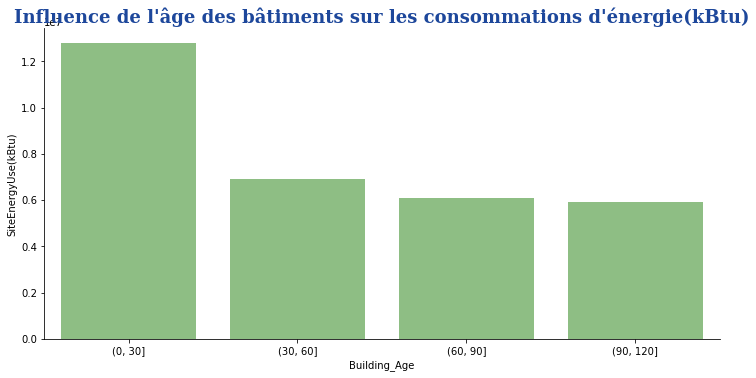

In [87]:
sns.catplot(
    data=data, kind="bar",
    x=pd.cut(data['Building_Age'], bins=classes), y="SiteEnergyUse(kBtu)",
    ci=None, color="#38a422", alpha=.6,
    height=5, aspect=2
)
plt.title("Influence de l'âge des bâtiments sur les consommations d'énergie(kBtu)", fontdict=font_title)
plt.show()

In [88]:
#Les bâtiments de moins de 30 ans semblent avoir des consommations d'énergie et rejets de CO2 plus important
#que les buildings anciens

In [89]:
from math import radians, cos, sin, asin, sqrt

#Coordonnées du centre de Seattle
seattle_lat = 47.6062
seattle_lon = -122.3321

def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d

In [90]:
#Calcul des distance au centre de Seattle pour chaque point
data['distance_centre'] = [haversine_distance(seattle_lat, seattle_lon, x, y) 
                              for x, y in zip(data.Latitude.astype(float), data.Longitude.astype(float))]

In [91]:
#Supprimer les variables non pertinents:
data=data.drop(['DataYear','Outlier','Latitude','Longitude','ComplianceStatus'], axis='columns')

In [92]:
data.iloc[0:10]

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Building_Age,distance_centre
0,NonResidential,Hotel,7,DOWNTOWN,1.0,12.0,88434,0,88434,Hotel,88434.0,No Use,0.0,No Use,0.0,65.0,78.9,6981428.0,249.43,2.64,88,0.496412
1,NonResidential,Hotel,7,DOWNTOWN,1.0,11.0,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,51.0,94.4,8354235.0,263.51,2.38,19,0.480394
2,NonResidential,Hotel,7,DOWNTOWN,1.0,41.0,961990,0,961990,Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,18.0,96.6,73130656.0,2061.48,1.92,46,0.558193
4,NonResidential,Hotel,7,DOWNTOWN,1.0,18.0,119890,12460,107430,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,67.0,120.1,14829099.0,507.70,4.02,35,0.663901
5,Nonresidential COS,Other,7,DOWNTOWN,1.0,2.0,97288,37198,60090,Police Station,88830.0,No Use,0.0,No Use,0.0,NaN,135.7,12051984.0,304.62,2.81,16,0.739535
6,NonResidential,Hotel,7,DOWNTOWN,1.0,11.0,83008,0,83008,Hotel,81352.0,No Use,0.0,No Use,0.0,25.0,76.9,6252842.0,208.46,2.37,89,0.547244
7,NonResidential,Other,7,DOWNTOWN,1.0,8.0,102761,0,102761,Other - Entertainment/Public Assembly,102761.0,No Use,0.0,No Use,0.0,NaN,62.5,6426022.0,199.99,1.77,89,0.464225
8,NonResidential,Hotel,7,DOWNTOWN,1.0,15.0,163984,0,163984,Hotel,163984.0,No Use,0.0,No Use,0.0,46.0,77.0,12633744.0,331.61,1.83,111,0.250190
10,NonResidential,Hotel,7,DOWNTOWN,1.0,11.0,153163,19279,133884,Missing information,133884.0,No Use,0.0,No Use,0.0,48.0,101.1,14719853.0,576.63,3.59,46,0.121332
11,NonResidential,Hotel,7,DOWNTOWN,1.0,25.0,333176,61161,272015,Hotel,336640.0,No Use,0.0,No Use,0.0,32.0,82.3,27717026.0,723.40,1.93,17,0.093154


In [93]:
#VI-Exploration :
#analyser les corrélations linéaires entre les variables
matrice_corr = data.corr()
matrice_corr

,CouncilDistrictCode,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Building_Age,distance_centre
CouncilDistrictCode,1.000000,-0.020520,0.275529,0.128290,0.193510,0.101613,0.086838,0.163172,0.072772,0.108014,0.078774,0.065508,0.022097,-0.005170,0.043419,-0.220577
NumberofBuildings,-0.020520,1.000000,-0.021489,0.636685,0.000017,0.683441,0.701981,0.043629,-0.004911,-0.057302,0.025613,0.606298,0.350586,0.025870,0.018699,0.022631
NumberofFloors,0.275529,-0.021489,1.000000,0.486471,0.497653,0.429364,0.416651,0.478250,0.261039,0.127060,0.022306,0.269989,0.151007,-0.053461,-0.098377,-0.310982
PropertyGFATotal,0.128290,0.636685,0.486471,1.000000,0.467120,0.986303,0.971529,0.577976,0.317582,0.136437,0.041931,0.771787,0.521463,-0.011382,-0.141824,-0.172084
PropertyGFAParking,0.193510,0.000017,0.497653,0.467120,1.000000,0.314882,0.356563,0.499261,0.238303,0.116990,0.057566,0.203164,0.093102,-0.090569,-0.287766,-0.189033
PropertyGFABuilding(s),0.101613,0.683441,0.429364,0.986303,0.314882,1.000000,0.976366,0.527289,0.296452,0.126996,0.034272,0.790569,0.542392,0.004678,-0.098558,-0.149459
LargestPropertyUseTypeGFA,0.086838,0.701981,0.416651,0.971529,0.356563,0.976366,1.000000,0.471590,0.211866,0.122623,0.033377,0.811348,0.573753,0.028336,-0.107984,-0.130300
SecondLargestPropertyUseTypeGFA,0.163172,0.043629,0.478250,0.577976,0.499261,0.527289,0.471590,1.000000,0.506948,0.119709,0.067920,0.454113,0.418873,0.031581,-0.201141,-0.203351
ThirdLargestPropertyUseTypeGFA,0.072772,-0.004911,0.261039,0.317582,0.238303,0.296452,0.211866,0.506948,1.000000,0.032583,0.051464,0.291056,0.277761,0.102389,-0.073250,-0.107743
ENERGYSTARScore,0.108014,-0.057302,0.127060,0.136437,0.116990,0.126996,0.122623,0.119709,0.032583,1.000000,-0.342340,-0.057750,-0.091705,-0.285131,0.035619,-0.063519


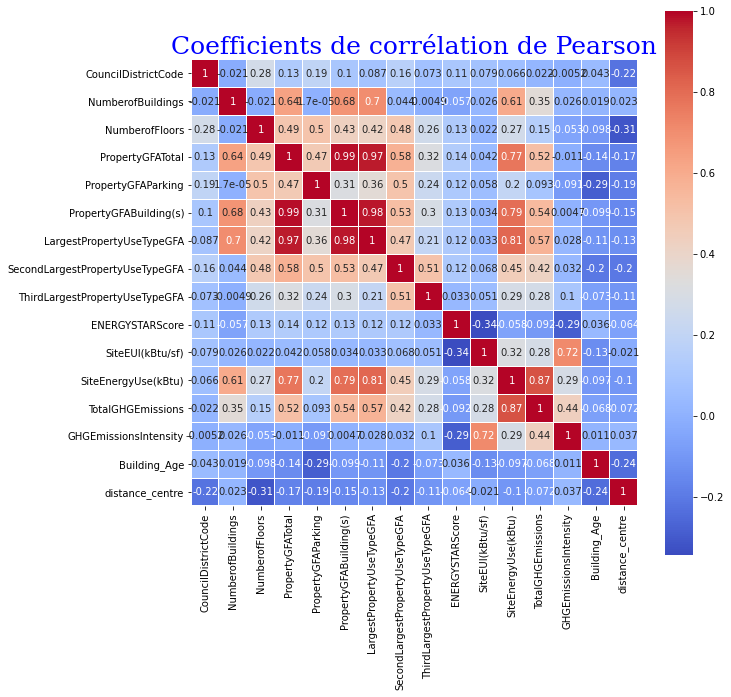

In [94]:
#visualiser les resultats dans un heatmap
font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 25,
        }
fig = plt.figure(figsize=(10,10))
sns.heatmap(matrice_corr, square=True, linewidths=0.01, annot=True, cmap='coolwarm')
plt.title("Coefficients de corrélation de Pearson", fontdict=font)
plt.show()

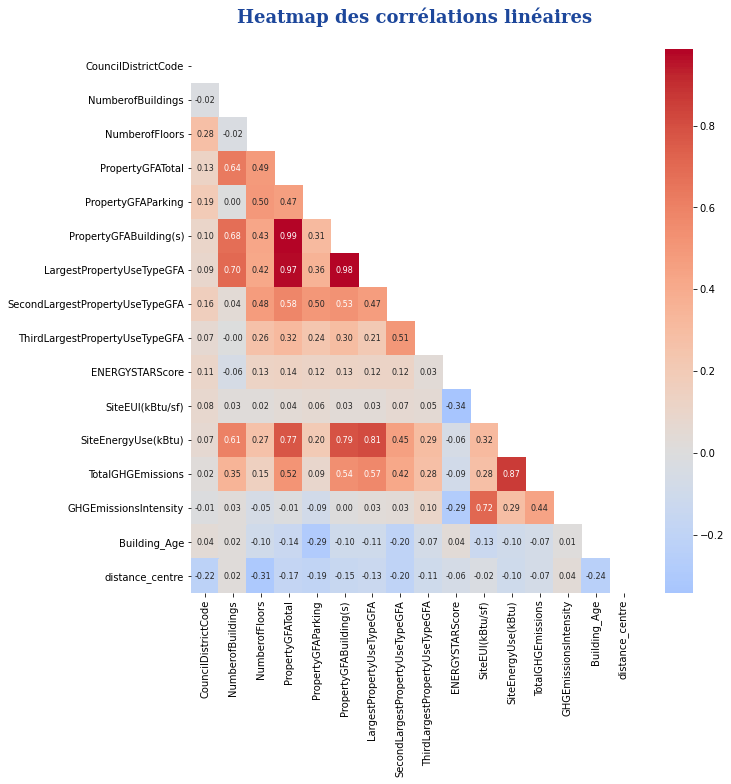

In [95]:
#analyser les corrélations linéaires entre les variables

font_title = {'family': 'serif',
              'color':  '#1d479b',
              'weight': 'bold',
              'size': 18,
             }
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", 
          fontdict=font_title)
plt.show()

In [96]:
threshold = 0.70
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
16,PropertyGFABuilding(s),PropertyGFATotal,0.986303
14,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,0.976366
12,LargestPropertyUseTypeGFA,PropertyGFATotal,0.971529
10,SiteEnergyUse(kBtu),TotalGHGEmissions,0.866257
8,SiteEnergyUse(kBtu),LargestPropertyUseTypeGFA,0.811348
6,SiteEnergyUse(kBtu),PropertyGFABuilding(s),0.790569
4,SiteEnergyUse(kBtu),PropertyGFATotal,0.771787
2,SiteEUI(kBtu/sf),GHGEmissionsIntensity,0.715042
0,LargestPropertyUseTypeGFA,NumberofBuildings,0.701981


In [97]:
#supprimer les variables corrollées entre elles
data = data.drop(['PropertyGFABuilding(s)','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA'], axis=1)

In [98]:
matrice_corr2 = data.corr(method='spearman')
matrice_corr2

,CouncilDistrictCode,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Building_Age,distance_centre
CouncilDistrictCode,1.000000,-0.042053,0.463035,0.209885,0.274750,0.156819,0.107713,0.164663,0.231390,0.168343,0.003515,0.030850,-0.341099
NumberofBuildings,-0.042053,1.000000,-0.037810,0.101237,-0.012671,-0.017581,-0.047186,0.071710,0.122607,0.120531,0.087969,-0.050369,0.055213
NumberofFloors,0.463035,-0.037810,1.000000,0.506788,0.455831,0.205805,0.155506,0.181233,0.436666,0.289837,-0.083646,-0.080989,-0.515776
PropertyGFATotal,0.209885,0.101237,0.506788,1.000000,0.441852,0.202234,0.147020,0.175468,0.741161,0.576777,-0.046474,-0.283703,-0.285139
PropertyGFAParking,0.274750,-0.012671,0.455831,0.441852,1.000000,0.190848,0.057256,0.197496,0.367766,0.216369,-0.140719,-0.384753,-0.227076
ThirdLargestPropertyUseTypeGFA,0.156819,-0.017581,0.205805,0.202234,0.190848,1.000000,0.064086,0.102273,0.206859,0.145181,-0.037421,-0.009688,-0.232185
ENERGYSTARScore,0.107713,-0.047186,0.155506,0.147020,0.057256,0.064086,1.000000,-0.493702,-0.148691,-0.113362,-0.269567,0.011204,-0.079969
SiteEUI(kBtu/sf),0.164663,0.071710,0.181233,0.175468,0.197496,0.102273,-0.493702,1.000000,0.719298,0.667905,0.637908,-0.167473,-0.114418
SiteEnergyUse(kBtu),0.231390,0.122607,0.436666,0.741161,0.367766,0.206859,-0.148691,0.719298,1.000000,0.865444,0.408746,-0.277146,-0.261156
TotalGHGEmissions,0.168343,0.120531,0.289837,0.576777,0.216369,0.145181,-0.113362,0.667905,0.865444,1.000000,0.725449,-0.163780,-0.177669


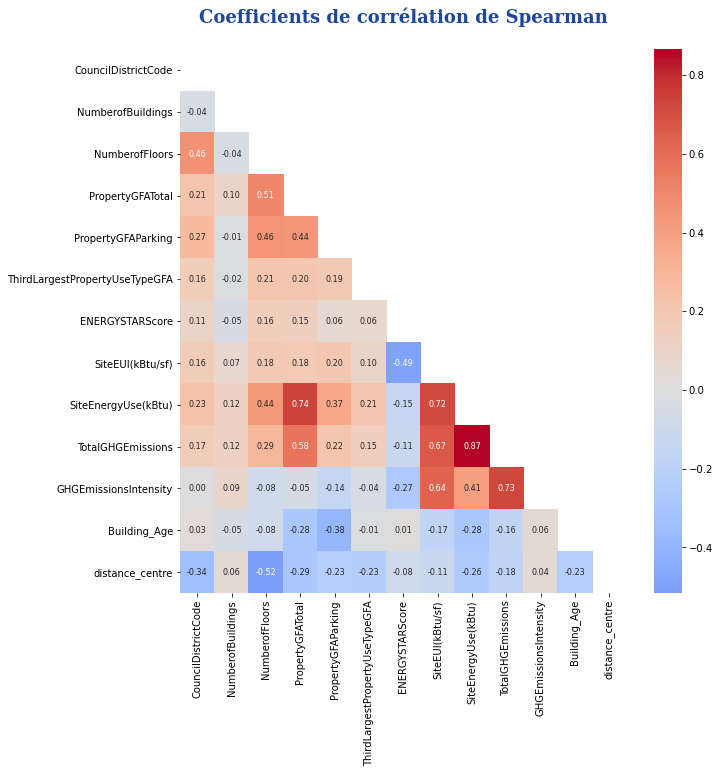

In [99]:
mask = np.zeros_like(matrice_corr2)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(matrice_corr2, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Coefficients de corrélation de Spearman\n", 
          fontdict=font_title)
plt.show()

In [100]:
#On remarques qu'il a des  relations non-linéaires monotones entre les variables cibles et certaines variables

In [101]:
#Exportation de jeu de données nettoyées

data.to_csv("data.csv",header=True,index=False)